In [21]:
import pandas as pd
from numpy.random import randn

### Plotting using pandas

In [22]:
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [23]:
%matplotlib inline

In [24]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


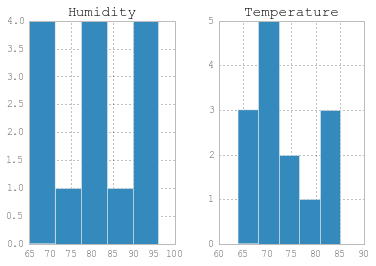

In [25]:
df.hist(['Temperature','Humidity'],bins=5)
plt.show()

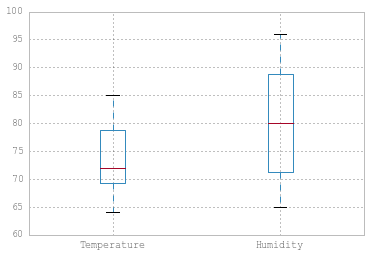

In [26]:
df[['Temperature','Humidity']].plot(kind='box')

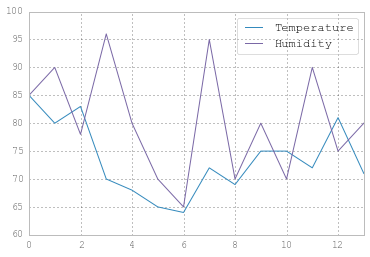

In [27]:
df[['Temperature','Humidity']].plot(kind='line')

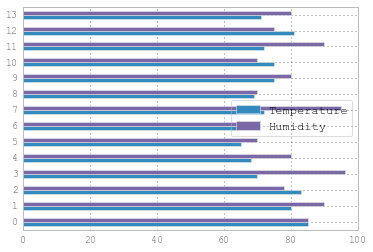

In [28]:
df[['Temperature','Humidity']].plot(kind='barh')

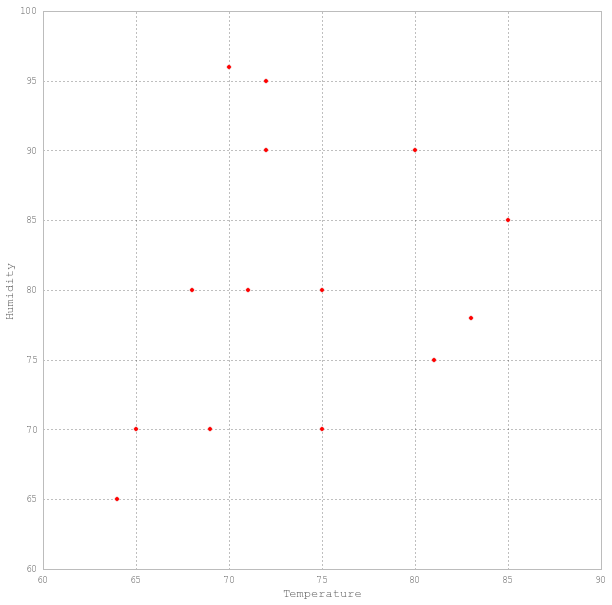

In [29]:
df.plot('Temperature', 'Humidity', kind='scatter', c = "red",figsize=(10,10))

In [30]:
groups=df.groupby('Outlook')

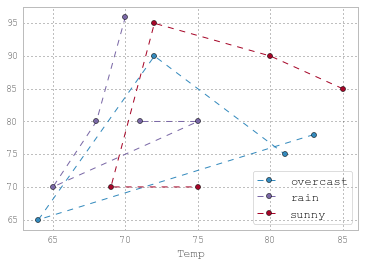

In [31]:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, 
            marker='o', linestyle='--', ms=5, label=name)
ax.legend(numpoints=1, loc='lower right')
ax.set_xlabel("Temp")
plt.show()

### EDA

In [32]:
df['Outlook'].value_counts()

rain        5
sunny       5
overcast    4
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F093C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010FA20F0>]], dtype=object)

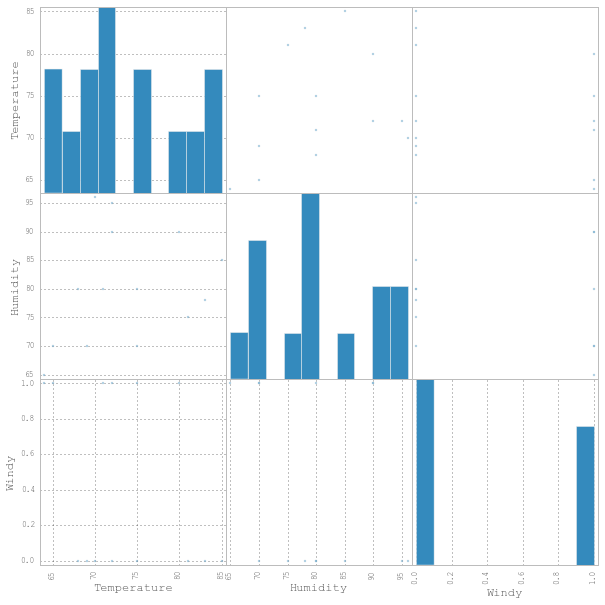

In [33]:
pd.scatter_matrix(df, figsize=(10,10))

In [34]:
df.Outlook.unique()

array(['sunny', 'overcast', 'rain'], dtype=object)

In [35]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5
Play,NaN,9
overcast,4,NaN
rain,5,NaN
sunny,5,NaN


In [36]:
pd.crosstab(df['Outlook'], df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


In [37]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


In [38]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


In [39]:
df.cov()

,Temperature,Humidity,Windy
Temperature,43.18681,17.67033,-1.10989
Humidity,17.67033,96.83516,-1.285714
Windy,-1.10989,-1.285714,0.2637363


In [40]:
df.corr()

,Temperature,Humidity,Windy
Temperature,1.000000,0.273245,-0.328866
Humidity,0.273245,1.000000,-0.254415
Windy,-0.328866,-0.254415,1.000000


In [41]:
temp_humidity = df[['Temperature', 'Humidity']].corr()
temp_humidity

,Temperature,Humidity
Temperature,1.000000,0.273245
Humidity,0.273245,1.000000


([<matplotlib.axis.YTick at 0x11550f28>,
 <a list of 3 Text yticklabel objects>)

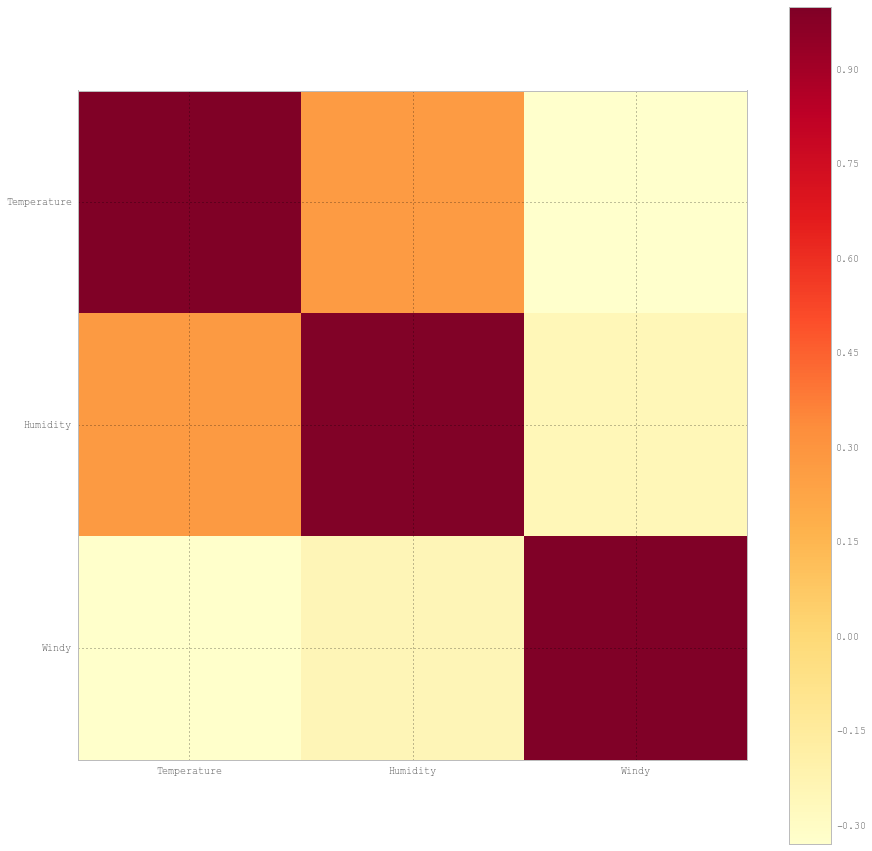

In [42]:
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 15)
allcorr = df.corr()
plt.imshow(allcorr, cmap='YlOrRd', interpolation='none');
plt.colorbar()
plt.xticks(range(len(allcorr)), allcorr.columns)
plt.yticks(range(len(allcorr)), allcorr.columns)